In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./fig/Jennie.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

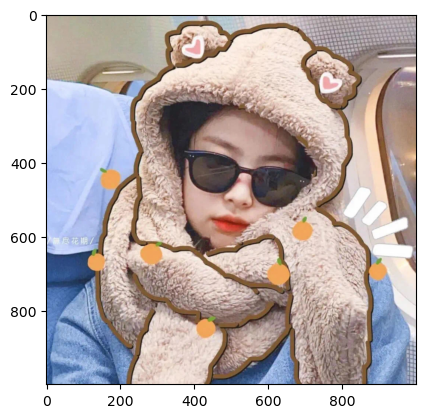

In [ ]:
plt.imshow(img_rgb)

In [4]:
hist = cv2.calcHist([img_rgb], [0], None, [256], [0, 255])

In [5]:
hist.shape[0]

256

In [6]:
x = np.linspace(0, 255, 256)

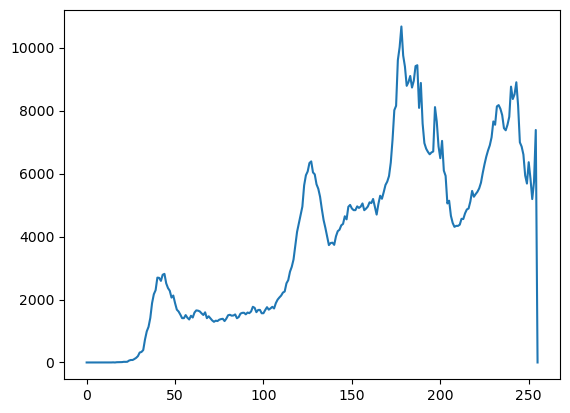

In [7]:
plt.plot(x, hist)

## 绘制直方图

In [8]:
hist1 = cv2.calcHist([img_rgb], [0], None, [256], [0, 255])
hist2 = cv2.calcHist([img_rgb], [1], None, [256], [0, 255])
hist3 = cv2.calcHist([img_rgb], [2], None, [256], [0, 255])

(array([13.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

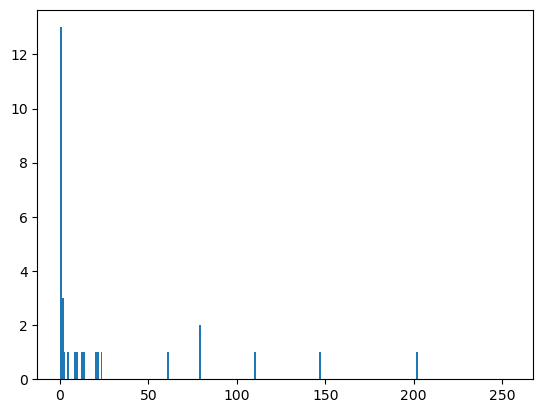

In [9]:
plt.hist(hist1.ravel(), bins=256, range=[0, 255])
#plt.hist(hist2.ravel(), bins=256, range=[0, 255])
#plt.hist(hist3.ravel(), bins=256, range=[0, 255])

## 掩膜

In [10]:
img = cv2.imread('./fig/lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
mask = np.zeros(gray.shape, np.uint8)
mask[100:200, 100:200] = 255

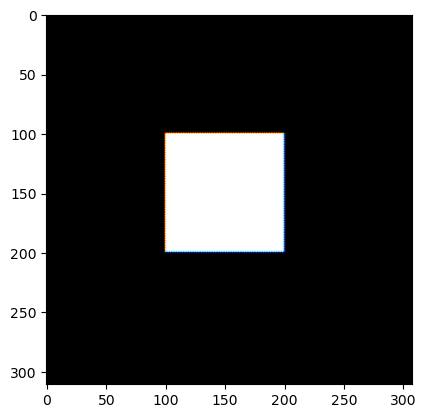

In [12]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BAYER_BG2RGB))

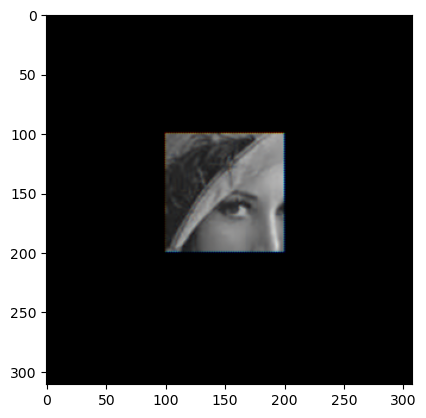

In [13]:
plt.imshow(cv2.cvtColor(cv2.bitwise_and(gray, gray, mask=mask), cv2.COLOR_BAYER_BG2RGB))

## 直方图均衡化

In [14]:
img = cv2.imread('./fig/lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(gray, cv2.COLOR_BAYER_BG2RGB)

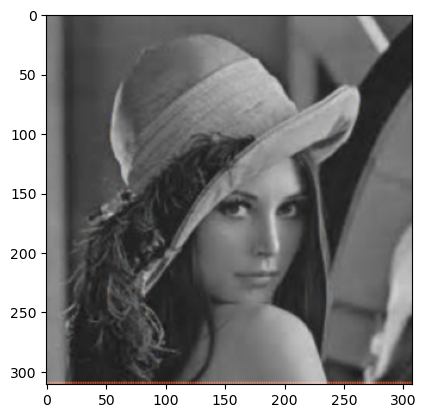

In [15]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BAYER_BG2RGB))

In [16]:
gray_dark = gray - 20
gray_bright = gray + 20

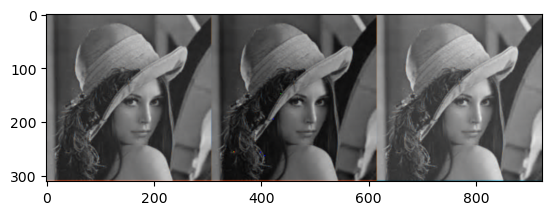

In [17]:
plt.imshow(cv2.cvtColor(np.hstack((gray, gray_dark, gray_bright)), cv2.COLOR_BAYER_BG2RGB))

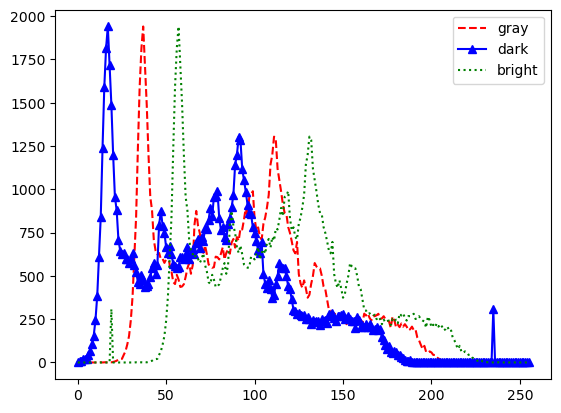

In [18]:
# 查看直方图
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 255])
hist_dark = cv2.calcHist([gray_dark], [0], None, [256], [0, 255])
hist_bright = cv2.calcHist([gray_bright], [0], None, [256], [0, 255])

# 画
plt.plot(hist_gray, 'r--',label='gray')
plt.plot(hist_dark, 'b^-',label='dark')
plt.plot(hist_bright, ':g',label='bright')
plt.legend()
plt.show()

In [19]:
# 均衡化处理
dark_equ = cv2.equalizeHist(gray_dark)
bright_equ = cv2.equalizeHist(gray_bright)

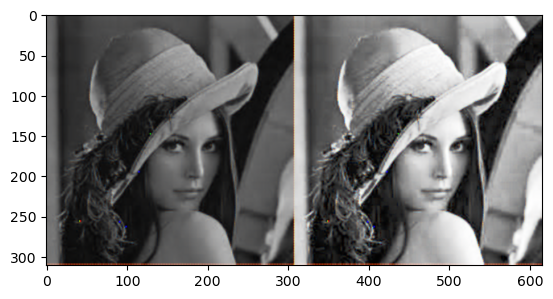

In [20]:
plt.imshow(cv2.cvtColor(np.hstack((gray_dark, dark_equ)), cv2.COLOR_BAYER_BG2RGB))

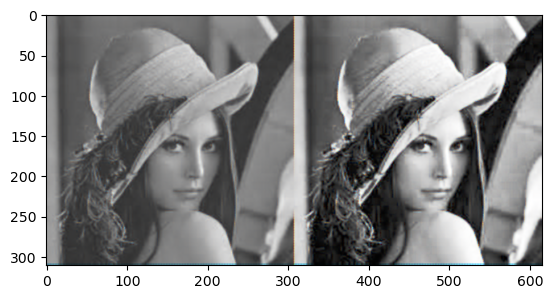

In [21]:
plt.imshow(cv2.cvtColor(np.hstack((gray_bright, bright_equ)), cv2.COLOR_BAYER_BG2RGB))

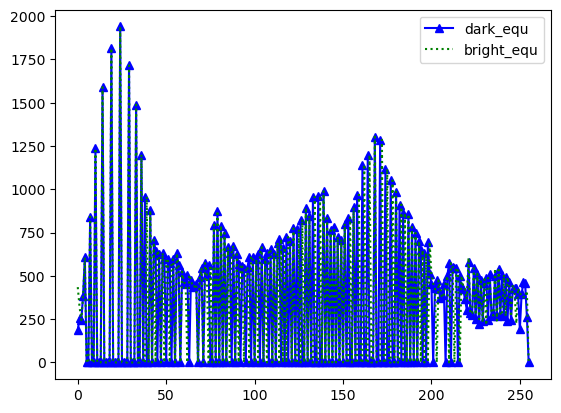

In [23]:
# 查看直方图
hist_dark_equ = cv2.calcHist([dark_equ], [0], None, [256], [0, 255])
hist_bright_equ = cv2.calcHist([bright_equ], [0], None, [256], [0, 255])

# 画
plt.plot(hist_dark_equ, 'b^-',label='dark_equ')
plt.plot(hist_bright_equ, ':g',label='bright_equ')
plt.legend()
plt.show()